In [95]:
import numpy as np 
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [2]:
allData = pd.read_csv("journal.pone.0185912.s003.csv")
allData.head(10)

,Source,Site_source,Target,Site_target,Transfers,Year,Week
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6
9,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,8


In [174]:
allData['FullSourceName'] = allData.Source + allData.Site_source
allData['FullTargetName'] = allData.Target + allData.Site_target
allData['Transfer'] = allData.FullSourceName +'='+ allData.FullTargetName
allData['BackwardsTransfer'] = allData.FullTargetName +'='+ allData.FullSourceName
allData['WeekFromStart'] = (allData.Year-2014)*52 + allData.Week - 48



allData.head(20)
np.unique(allData.WeekFromStart.values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [175]:
allData['TimePeriod'] = (allData.WeekFromStart / 4).astype(int)
allData.head(20)

,Source,Site_source,Target,Site_target,Transfers,Year,Week,FullSourceName,FullTargetName,Transfer,WeekFromStart,TimePeriod,BackwardsTransfer
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,0,0,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,0,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,0,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,5,1,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,6,1,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,7,1,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,9,2,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,10,2,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH
9,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,8,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,12,3,ChartwellUnitPRUH=AcuteMedicalUnit.EAUPRUH


In [201]:
np.unique(allData.Source.values)

array(['AcuteMedicalUnit.EAU', 'AcuteSurgicalUnit',
       'AdultCysticFibrosisUnit', 'AnnieZunz', 'Boddington.ORP.',
       'BrunelAdmissionsLounge', 'Byron', 'ChartwellUnit', 'Cheere',
       'ChristineBrownCriticalCare', 'ClinicalDecisionUnit.A.E..DH',
       'ClinicalDecisionUnit.PRUH', 'Coptcoat', 'CoronaryCareUnit.PRUH.',
       'CoronaryCareUnit.SamOram.', 'Cotton', 'DavidMarsden', 'Davidson',
       'Dawson', 'DerekMitchellUnit', 'DischargeLounge', 'Donne',
       'ElfandLibra', 'FarnboroughDayWard', 'FarnboroughWard', 'Fisk',
       'Fisk.CheereHDU', 'FrankCooksey', 'Guthrie',
       'HASU.HyperAcuteStrokeUnit.PRUH.', 'Howard',
       'IntensiveCare.HighDepUnit.PRUH.', 'KCH.EmergencyDept',
       'KatherineMonk', 'KinnierWilson', 'KinnierWilsonHDU', 'Lister',
       'LiverICU', 'Lonsdale', 'MarjorieWarren', 'MaryRay',
       'MatthewWhiting', 'MedicalCriticalCareUnit', 'MedicalWard1',
       'MedicalWard2', 'MedicalWard3', 'MedicalWard4', 'MedicalWard6',
       'MedicalWard7',

In [5]:
reducedData = allData[['Transfer','Transfers','TimePeriod']]
reducedData.head(10)

,Transfer,Transfers,TimePeriod
0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,0
1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0
2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0
3,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,0
4,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,1
5,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,1
6,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,1
7,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,2
8,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,2
9,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,3


In [6]:
group = reducedData.groupby(['Transfer', 'TimePeriod'], as_index=False).sum()
group.head()

,Transfer,TimePeriod,Transfers
0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,0,8
1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,5
2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,5
3,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,10
4,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,4,11


In [7]:
ACU2CUtransfers = group[group['Transfer']=='AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH'].Transfers.values
ACU2CUtimePeriod = group[group['Transfer']=='AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH'].TimePeriod.values

            Transfers
TimePeriod           
0            4.080711
1            4.230278
2            4.175559
3            4.335613
4            3.977656
5            4.125399
6            4.412677
7            4.758778
8            4.518012
9            4.580939
10           4.471956
11           4.357045
12           4.544004
13           4.344277
14           4.478340
15           4.585043
16           3.980392
17           4.260830
18           4.115823
19           4.155039
20           2.548108


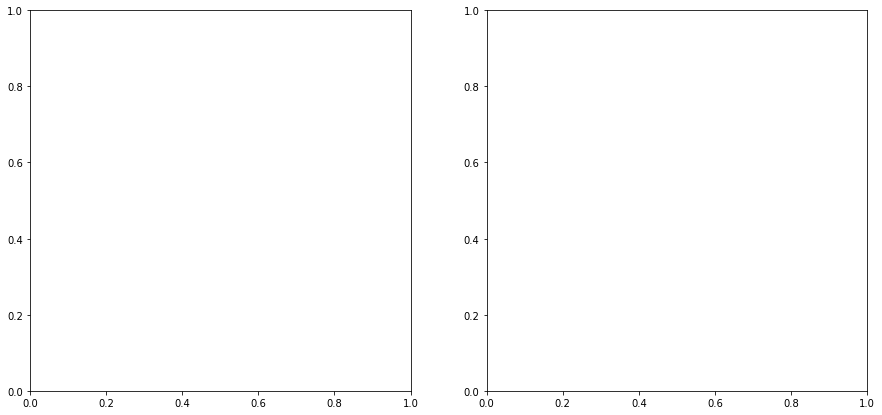

In [9]:
print(np.asarray(indexOfDispersion).argsort())

[ 37  15 189  40 227 114 226 230 167  67  14 113  64  63  54 201 203 146
  91   5  66  71  45 206   1 221 186 110 121 142 233 190 109  74  55 232
 136  98 115  75 199 231 112 150 148  82  50 122  47 188 144 200  52   8
 166 100 170 108  73 135 107 129  87  10  12  25   3 204 180 132 152 101
 147  95 151  92  28  96 130 160 168  61  77   0  88  23  38  57 223 212
 197 116 133 162  86  46  41 169  31 205 102 126  84 140 173  80 137 134
 202  51 208  42 103 164 127  76 187 104   6 225 111  53 219  62  97 220
 141   4  85  27  83  59  65  17   2  36 128 155  81 191 123 149 175  43
  99 198  11 229 145 222  35  78 157 196 213 139  58 124 117 131 218   7
 138   9 214  70  16 185  26 143  30  48  89 179 184 193 171 174  56 172
 228  24 211 158 159  79  33  69  21 183 105 176  32 125 106  29  94 207
 224 154  18 161 192 217  20 153  39 163 181  34  49  44  19 209  60  13
  22 216 210  72 156 195 215 194 119 182 177  93 178 120 118  68 165  90]


In [10]:
group.nunique()[0]

2193

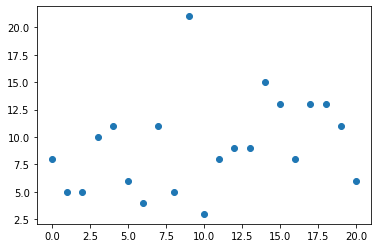

In [11]:
plt.scatter(ACU2CUtimePeriod,ACU2CUtransfers)
plt.show()

In [12]:
PRUHWards = np.unique(allData[allData['Site_target'] == 'PRUH'].FullTargetName.values)
PRUHWards.shape

(29,)

In [13]:
np.unique(allData[allData['Site_target'] == 'DH'].FullTargetName.values).shape


(46,)

In [14]:
np.unique(allData[allData['Site_target'] == 'Orpington'].FullTargetName.values).shape

(5,)

In [179]:
def yearlyTransfers(data, site, year = 2015, group = False, alldata = False, singleTransfer = False):
    
    if alldata == True:
        siteDataOut = data
        siteDataIn = data
        
    elif singleTransfer == True:
        siteDataOut = data[data['Transfer'] == site]
        siteDataIn = data[data['BackwardsTransfer'] == site]
        
    else:
        siteDataOut = data[data['Site_source'] == site]
        siteDataIn = data[data['Site_target'] == site]
    
    siteTransfersOut = siteDataOut[siteDataOut['Year'] == year].groupby(['Week']).sum()['Transfers']
    siteTransfersIn = siteDataIn[siteDataIn['Year'] == year].groupby(['Week']).sum()['Transfers']
    
    #merge the first and last weeks of the year as there are 53 but they combine to 8 days so *7/8
    
    siteTransfersOut = siteTransfersOut.reindex(range(0,53)).fillna(0).reset_index().drop(['Week'],axis = 1)
    siteTransfersOut = siteTransfersOut.iloc[:,0]
    siteTransfersOut[0] = round((siteTransfersOut[0] + siteTransfersOut[52])*(7/8))
    siteTransfersOut = siteTransfersOut.drop([52])
    
    
    siteTransfersIn = siteTransfersIn.reindex(range(0,53)).fillna(0).reset_index().drop(['Week'],axis = 1)
    siteTransfersIn = siteTransfersIn.iloc[:,0]
    siteTransfersIn[0] = round((siteTransfersIn[0] + siteTransfersIn[52])*(7/8))
    siteTransfersIn = siteTransfersIn.drop([52])
    
    #group transfers every four weeks
    if group == True:
        groupedTransfersOut = siteTransfersOut.groupby(siteTransfersOut.index // 4).sum()
        groupedTransfersIn = siteTransfersIn.groupby(siteTransfersIn.index // 4).sum()
    else:
        groupedTransfersOut = siteTransfersOut
        groupedTransfersIn = siteTransfersIn
    
    return groupedTransfersOut, groupedTransfersIn

In [97]:
def polyPlot(x,parameters):
    y = parameters[0] + parameters[1]*x + parameters[2]*x*x + parameters[3]*x*x*x
    return y

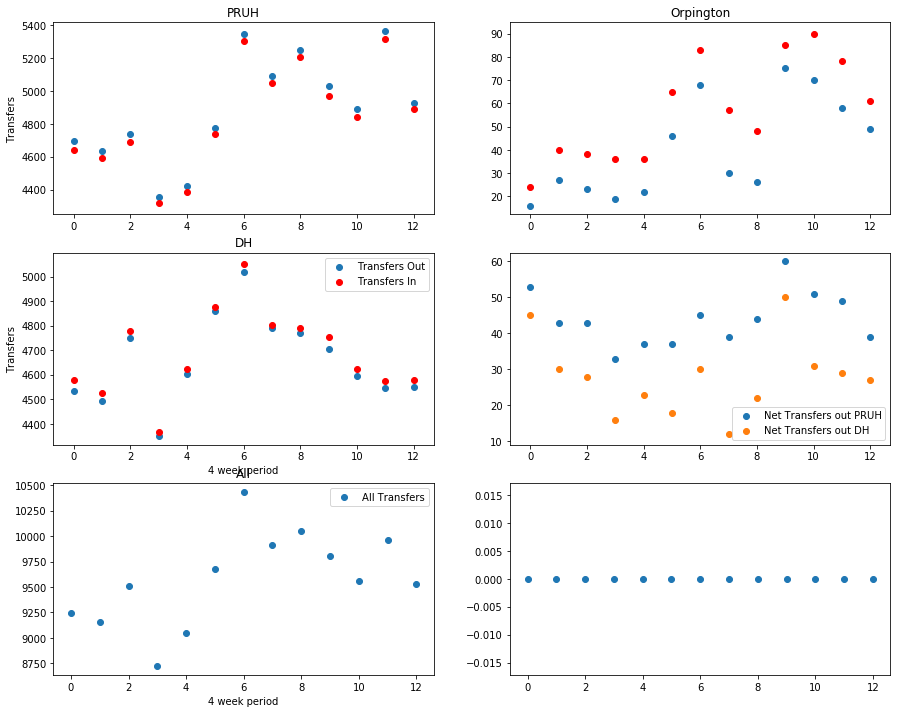

In [130]:
#total transfers throughout 2015

#PRUH = allData[allData['Site_source'] == 'PRUH']
#Orp = allData[allData['Site_source'] == 'Orpington']
#DH = allData[allData['Site_source'] == 'DH']

#transfersPRUH = PRUH[PRUH['Year'] == 2015].groupby(['Week']).sum()['Transfers']
#transfersOrp = Orp[Orp['Year'] == 2015].groupby(['Week']).sum()['Transfers']
#transfersDH = DH[DH['Year'] == 2015].groupby(['Week']).sum()['Transfers']

#check if 2015 has both week 0 and 52
#print(totalTransfers)
#totalTransfers[0] = (totalTransfers[0] + totalTransfers[52])*(7/8)

#totalTransfers.drop(totalTransfers.index[52])

#groupedTransfers = totalTransfers[0:51].groupby(totalTransfers[0:51].index // 4).sum()

PRUHOut, PRUHIn = yearlyTransfers(allData, 'PRUH', group = True)



OrpOut, OrpIn = yearlyTransfers(allData, 'Orpington', group = True)
DHOut,DHIn = yearlyTransfers(allData, 'DH', group = True)
allTransfers970980980,alltranns = yearlyTransfers(allData, 'DH', group = True, alldata = True)

x = range(0,PRUH.shape[0],1)
#print(x, groupedTransfers.shape)

coefs = np.polynomial.polynomial.polyfit(x,PRUH,3)
coefsDH = np.polynomial.polynomial.polyfit(x,DH,3)

#dataplot = np.array((x,PRUH))
 
#tck,u = interpolate.splprep(dataplot, s=0)

#unew = np.arange(0, 1.01, 0.01)

#out = interpolate.splev(unew, tck)



fig,axs = plt.subplots(3,2, figsize = (15,12))

#axs[0,0].plot(out[0], out[1], color='orange')

#axs[0,0].plot(x, polyPlot(x,coefs), '-o', color = 'r')
#axs[1,0].plot(x, polyPlot(x,coefsDH), '-o', color = 'r')


axs[0,0].scatter(x, PRUHOut)
axs[0,0].scatter(x, PRUHIn,color ='r')
axs[0,0].set_title('PRUH')
axs[0,0].set_ylabel('Transfers')

axs[0,1].scatter(x, OrpOut)
axs[0,1].scatter(x, OrpIn, color = 'r')
axs[0,1].set_title('Orpington')


axs[1,0].scatter(x, DHOut,label = 'Transfers Out')
axs[1,0].scatter(x, DHIn, color = 'r',label = 'Transfers In')
axs[1,0].set_title('DH')
axs[1,0].set_ylabel('Transfers')
axs[1,0].set_xlabel('4 week period')
axs[1,0].legend()

PRUHNet = PRUHOut - PRUHIn
DHNet = DHIn - DHOut
OrpNet = OrpIn - OrpOut
totalNet = -1*PRUHNet + DHNet + OrpNet

axs[1,1].scatter(x, PRUHNet, label = 'Net Transfers out PRUH')
axs[1,1].scatter(x, DHNet, label = 'Net Transfers out DH')
axs[1,1].legend()

axs[2,0].scatter(x, allTransfers970980980, label = 'All Transfers')
axs[2,0].set_title('All')
axs[2,0].legend()
axs[2,0].set_xlabel('4 week period')

axs[2,1].scatter(x,totalNet)
#x = range(0,11,1)
#axs[1].scatter(x,groupedTransfers[0:11])

plt.show()

In [117]:
print(PRUH.max)

<bound method Series.max of 0     4694
1     4636
2     4735
3     4353
4     4423
5     4772
6     5348
7     5089
8     5251
9     5028
10    4892
11    5363
12    4928
Name: Transfers, dtype: int64>


In [57]:
np.unique(allData[allData['Year'] == 2015].Week.values, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 array([291, 384, 382, 398, 388, 391, 408, 398, 371, 397, 385, 401, 399,
        367, 356, 341, 343, 366, 367, 381, 393, 399, 371, 399, 366, 413,
        385, 389, 388, 378, 350, 367, 388, 365, 395, 389, 385, 389, 403,
        384, 387, 386, 389, 371, 374, 388, 385, 378, 363, 403, 374, 340,
        277]))

In [ ]:
np.unique(allData[allData['Year'] == 2016].Week.values, return_counts = True)

In [146]:
data15 = allData[allData['Year'] == 2015]

data15 = data15[data15['Year'] == 2015].groupby(['Week']).sum()['Transfers']

    siteTransfersIn = siteDataIn[siteDataIn['Year'] == year].groupby(['Week']).sum()['Transfers']
    
    #merge the first and last weeks of the year as there are 53 but they combine to 8 days so *7/8
    
    siteTransfersOut = siteTransfersOut.reindex(range(0,53)).fillna(0).reset_index().drop(['Week'],axis = 1)
    siteTransfersOut = siteTransfersOut.iloc[:,0]
    siteTransfersOut[0] = round((siteTransfersOut[0] + siteTransfersOut[52])*(7/8))
    siteTransfersOut = siteTransfersOut.drop([52])
data15 = data15[['Transfer','Transfers','TimePeriod']].groupby(['Transfer', 'TimePeriod'], as_index=False).sum()

meanTransfers = data15.groupby(['TimePeriod']).sum() / data15.nunique()[0]



print(data15.head())
indexOfDispersion = []
meanTransfers = []
varianceTransfers = []
varTest = []
listTransfersStrings = []

for trans in np.unique(data15['Transfer'].values):
    uniqueTransfer = data15[data15['Transfer']==trans].drop(['Transfer'],axis = 1).set_index('TimePeriod').reindex(range(1,21)).fillna(0).reset_index()
    if uniqueTransfer.Transfers.mean() > 5:
        listTransfersStrings.append(trans)
        meanTransfers.append(uniqueTransfer.Transfers.mean())
        #unbiased estimate of variance 
        varianceTransfers.append(uniqueTransfer.Transfers.var())
        
        varTest.append(np.sum(uniqueTransfer.Transfers - meanTransfers[-1]))
        
        indexOfDispersion.append(varianceTransfers[-1] / meanTransfers[-1])

    #print(trans, meanTransfers[-1],varianceTransfers[-1],indexOfDispersion[-1])
ioDdf = pd.DataFrame({'Transfer':listTransfersStrings,
                     'Mean': meanTransfers,
                     'Variance': varianceTransfers,
                     'IoD': indexOfDispersion}) 
                       
                     
ioDdf.head()

                                     Transfer  TimePeriod  Transfers
0  AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH           1          5
1  AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH           2          5
2  AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH           3         10
3  AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH           4         11
4  AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH           5          6


,Transfer,Mean,Variance,IoD
0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,5.142857,29.528571,5.741667
1,AcuteMedicalUnit.EAUPRUH=CoronaryCareUnit.PRUH...,12.666667,113.333333,8.947368
2,AcuteMedicalUnit.EAUPRUH=DischargeLoungePRUH,19.619048,282.247619,14.386408
3,AcuteMedicalUnit.EAUPRUH=ExitHospitalPRUH,82.190476,4327.861905,52.656489
4,AcuteMedicalUnit.EAUPRUH=FarnboroughWardPRUH,9.476190,89.861905,9.482915


In [151]:
uniqueTransfer = data15[data15['Transfer']=='AcuteMedicalUnit.EAUPRUH=DischargeLoungePRUH'].drop(['Transfer'],axis = 1).set_index('TimePeriod').reindex(range(0,21)).fillna(0).reset_index()
print(uniqueTransfer.head(20))
uniqueTransfer.Transfers.sum()
#sum((uniqueTransfer.Transfers - uniqueTransfer.Transfers.mean)**2)/ uniqueTransfer.shape[0]                      

    TimePeriod  Transfers
0            0        0.0
1            1       22.0
2            2       19.0
3            3       31.0
4            4       24.0
5            5       23.0
6            6       45.0
7            7       50.0
8            8       36.0
9            9       26.0
10          10       35.0
11          11       27.0
12          12       37.0
13          13       31.0
14          14        6.0
15          15        0.0
16          16        0.0
17          17        0.0
18          18        0.0
19          19        0.0


412.0

In [154]:
np.unique(data15.TimePeriod.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [173]:
data15 = allData[allData['Year'] == 2015][['Transfer','Week','Transfers']]

indexOfDispersion = []
meanTransfers = []
varianceTransfers = []
varTest = []
listTransfersStrings = []

for trans in np.unique(data15['Transfer'].values):
    uniqueTransfer = data15[data15['Transfer']==trans].drop(['Transfer'],axis = 1).set_index('Week').reindex(range(0,53)).fillna(0).reset_index().drop(['Week'],axis = 1)
    uniqueTransfer = uniqueTransfer.iloc[:,0]
    #print(uniqueTransfer[0])
    uniqueTransfer[0] = round((uniqueTransfer[0] + uniqueTransfer[52])*(7/8))
    uniqueTransfer = uniqueTransfer.drop([52])
    groupedUniqueTransfer = uniqueTransfer.groupby(uniqueTransfer.index // 4).sum()

    if uniqueTransfer.mean() > 5:
        listTransfersStrings.append(trans)
        meanTransfers.append(uniqueTransfer.mean())
        #unbiased estimate of variance 
        varianceTransfers.append(uniqueTransfer.var())

        #varTest.append(np.sum(uniqueTransfer.Transfers - meanTransfers[-1]))

        indexOfDispersion.append(varianceTransfers[-1] / meanTransfers[-1])

ioDdf = pd.DataFrame({'Transfer':listTransfersStrings,
                     'Mean': meanTransfers,
                     'Variance': varianceTransfers,
                     'IoD': indexOfDispersion}) 
                       
                     
ioDdf.head()
    


,Transfer,Mean,Variance,IoD
0,AcuteMedicalUnit.EAUPRUH=CoronaryCareUnit.PRUH...,5.115385,4.809955,0.940292
1,AcuteMedicalUnit.EAUPRUH=DischargeLoungePRUH,7.884615,11.711916,1.485414
2,AcuteMedicalUnit.EAUPRUH=ExitHospitalPRUH,33.134615,43.961916,1.326767
3,AcuteMedicalUnit.EAUPRUH=MedicalWard7PRUH,7.500000,12.686275,1.691503
4,AcuteMedicalUnit.EAUPRUH=MedicalWard9PRUH,7.134615,62.746229,8.794620


In [191]:
print(ioDdf.shape)

ioDdfSorted = ioDdf.sort_values(by=['IoD'])
print(ioDdfSorted)

(94, 4)
                                             Transfer       Mean    Variance  \
92                   Victoria.AlbertDH=ExitHospitalDH  10.846154    7.544495   
27                            HowardDH=ExitHospitalDH   6.634615    4.824661   
65  PRUH.EmergencyDeptPRUH=HASU.HyperAcuteStrokeUn...  22.442308   16.329940   
25  HASU.HyperAcuteStrokeUnit.PRUH.PRUH=ExitHospit...  16.423077   12.092006   
21                             DonneDH=ExitHospitalDH  10.269231    7.690799   
..                                                ...        ...         ...   
4           AcuteMedicalUnit.EAUPRUH=MedicalWard9PRUH   7.134615   62.746229   
73      PlannedInvestigationUnitPRUH=ExitHospitalPRUH   6.750000   84.269608   
68      PRUH.EmergencyDeptPRUH=SurgicalWard3.SAU.PRUH  23.961538  352.116139   
69           PRUH.EmergencyDeptPRUH=SurgicalWard4PRUH  22.288462  336.405354   
64         PRUH.EmergencyDeptPRUH=FarnboroughWardPRUH  10.442308  332.133861   

          IoD  
92   0.695592  

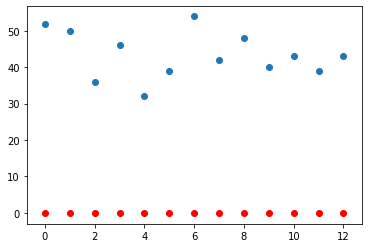

In [202]:
acuteWardOut, acuteWardIn = yearlyTransfers(allData, 'Victoria.AlbertDH=ExitHospitalDH', group = True, singleTransfer = True)

x = range(0,acuteWardOut.shape[0],1)

plt.scatter(x, acuteWardOut)
plt.scatter(x, acuteWardIn, color = 'r')
plt.show()

could check for outliers within - for example AcuteMedicalUnit.EAUPRUH=MedicalWard9PRUH